In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\anselmi bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_anselmi.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.790,0.854,0.703,0.703,1.230,1.124,1.792,0.984,0.790,0.703,...,1.792,1.124,1.230,0.780,1.792,0.790,0.703,0.780,1.230,1
1,0.615,0.703,0.854,0.703,0.790,1.792,0.790,0.854,0.790,1.230,...,0.790,0.703,0.703,1.323,1.124,1.230,0.703,0.854,0.703,1
2,0.780,0.703,0.703,1.230,0.790,1.323,0.780,1.230,0.780,0.703,...,0.790,1.323,0.703,0.615,0.854,0.615,0.703,0.854,0.790,1
3,0.703,0.703,1.323,1.124,1.792,1.124,1.792,0.790,0.703,0.703,...,0.703,0.615,1.323,0.780,0.703,0.615,0.703,0.854,0.790,1
4,1.230,1.323,0.780,0.703,0.615,0.703,0.854,0.615,0.703,0.854,...,0.790,0.703,0.854,0.615,0.703,0.780,1.792,1.124,1.792,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,0.780,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,0.790,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.124,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,0.780,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,0.780,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,0.790,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.124,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,0.780,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,0.780,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790
14665,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.854,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323
14666,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.703,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790
14667,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.615,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323,0
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124,0
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230,0
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703,0
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790,0
14665,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323,0
14666,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790,0
14667,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,1.001315
1,-79,1.004054
2,-78,1.009130
3,-77,1.005025
4,-76,1.006073
...,...,...
94,14,0.988201
95,15,0.992472
96,16,0.996236
97,17,0.993059


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,1.030252,150
1,-79,1.027237,151
2,-78,1.027749,152
3,-77,1.035601,153
4,-76,1.028470,154
...,...,...,...
94,14,1.037025,244
95,15,1.029616,245
96,16,1.035097,246
97,17,1.038854,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


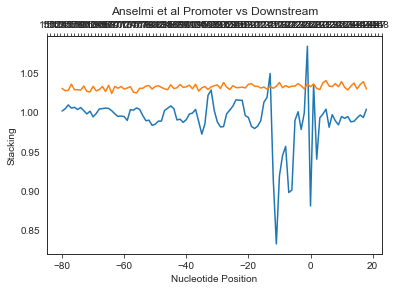

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Anselmi et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.790,0.854,0.703,0.703,1.230,1.124,1.792,0.984,0.790,0.703,...,1.792,1.124,1.230,0.780,1.792,0.790,0.703,0.780,1.230,1
1,0.615,0.703,0.854,0.703,0.790,1.792,0.790,0.854,0.790,1.230,...,0.790,0.703,0.703,1.323,1.124,1.230,0.703,0.854,0.703,1
2,0.780,0.703,0.703,1.230,0.790,1.323,0.780,1.230,0.780,0.703,...,0.790,1.323,0.703,0.615,0.854,0.615,0.703,0.854,0.790,1
3,0.703,0.703,1.323,1.124,1.792,1.124,1.792,0.790,0.703,0.703,...,0.703,0.615,1.323,0.780,0.703,0.615,0.703,0.854,0.790,1
4,1.230,1.323,0.780,0.703,0.615,0.703,0.854,0.615,0.703,0.854,...,0.790,0.703,0.854,0.615,0.703,0.780,1.792,1.124,1.792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790,0
29334,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323,0
29335,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790,0
29336,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
X.shape

(29338, 99)

## Model Training

In [28]:
kfold = KFold(n_splits=10, shuffle=True)
clf = XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1, 
                    max_depth=None, min_child_weight=5, n_estimators=300, 
                    subsample=1.0, n_jobs=-1, random_state=101)
fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.8847989093387867, Precision: 0.9026988636363636, Recall: 0.8634510869565217, F1 Score: 0.882638888888889, MCC: 0.7703626479153892, Specificity: 0.9062927496580028
Fold 2: Accuracy: 0.8943421949556919, Precision: 0.9180911680911681, Recall: 0.8685983827493261, F1 Score: 0.8926592797783934, MCC: 0.7899638235077785, Specificity: 0.9206896551724137
Fold 3: Accuracy: 0.8725289706884799, Precision: 0.8760029175784099, Recall: 0.8548042704626334, F1 Score: 0.8652737752161384, MCC: 0.7445520033731269, Specificity: 0.8888162197514715
Fold 4: Accuracy: 0.8766189502385822, Precision: 0.9031802120141342, Recall: 0.8502994011976048, F1 Score: 0.8759424263193968, MCC: 0.754809259986617, Specificity: 0.9042627533193571
Fold 5: Accuracy: 0.8776414451261078, Precision: 0.9044272663387211, Recall: 0.8523178807947019, F1 Score: 0.8775997272417321, MCC: 0.7568275738208194, Specificity: 0.9044943820224719
Fold 6: Accuracy: 0.8776414451261078, Precision: 0.8980169971671388, Recall: 0.855

In [29]:
accuracy_list

[0.8847989093387867,
 0.8943421949556919,
 0.8725289706884799,
 0.8766189502385822,
 0.8776414451261078,
 0.8776414451261078,
 0.8813905930470347,
 0.8704839809134287,
 0.8782816229116945,
 0.8888510057961132]

In [30]:
precision_list

[0.9026988636363636,
 0.9180911680911681,
 0.8760029175784099,
 0.9031802120141342,
 0.9044272663387211,
 0.8980169971671388,
 0.9104803493449781,
 0.8924652523774689,
 0.8740157480314961,
 0.9110320284697508]

In [31]:
recall_list

[0.8634510869565217,
 0.8685983827493261,
 0.8548042704626334,
 0.8502994011976048,
 0.8523178807947019,
 0.8550236008091706,
 0.8475609756097561,
 0.8396421197522368,
 0.8708987161198288,
 0.8642808912896691]

In [32]:
specificity_list

[0.9062927496580028,
 0.9206896551724137,
 0.8888162197514715,
 0.9042627533193571,
 0.9044943820224719,
 0.9007580978635424,
 0.9156378600823045,
 0.900742741390952,
 0.8850424559111691,
 0.9139118457300276]

In [33]:
f1_score_list 

[0.882638888888889,
 0.8926592797783934,
 0.8652737752161384,
 0.8759424263193968,
 0.8775997272417321,
 0.8759930915371331,
 0.8778947368421053,
 0.8652482269503546,
 0.8724544480171489,
 0.887040887040887]

In [34]:
mcc_list

[0.7703626479153892,
 0.7899638235077785,
 0.7445520033731269,
 0.754809259986617,
 0.7568275738208194,
 0.7562684421675996,
 0.7647226865947516,
 0.7420772386808878,
 0.7560591799869604,
 0.7788398623693066]

In [35]:
train_cm= confusion_matrix(testY, y_pred)
train_cm

array([[1327,  125],
       [ 201, 1280]], dtype=int64)

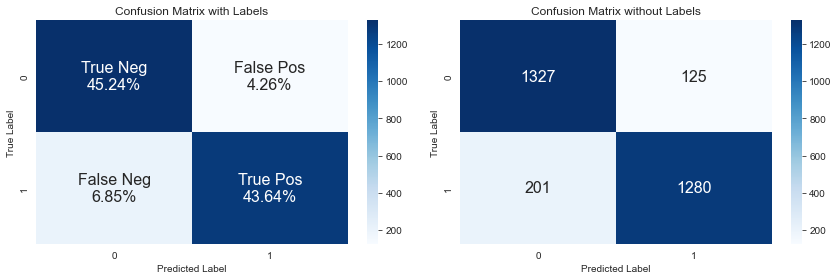

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [37]:
import pickle

# Save the trained model to a file in pickle format
model_filename = 'CAD_model.pickle'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print("Model saved successfully.")


Model saved successfully.


In [38]:
print(mean(accuracy_list))

0.8802579118142028


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


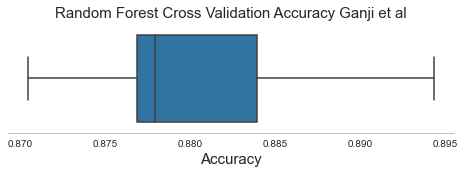

In [39]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [40]:
clf.feature_importances_

array([0.00535424, 0.00580632, 0.00590046, 0.00570913, 0.00612048,
       0.00565573, 0.00579432, 0.00543601, 0.00528262, 0.00518819,
       0.00579103, 0.00549306, 0.00552902, 0.00634843, 0.00542408,
       0.005436  , 0.00558138, 0.00574689, 0.00544035, 0.00597272,
       0.00551449, 0.00592421, 0.00537565, 0.00614571, 0.0053807 ,
       0.00557264, 0.00571556, 0.00515244, 0.00740844, 0.00607074,
       0.00571914, 0.00530826, 0.0050334 , 0.00516353, 0.00542592,
       0.00582287, 0.00544738, 0.00544953, 0.00610496, 0.00528542,
       0.00623958, 0.00616913, 0.00587522, 0.00476224, 0.00483303,
       0.0066503 , 0.00672429, 0.00674152, 0.00669609, 0.00643968,
       0.00588433, 0.00648715, 0.00674924, 0.00655606, 0.00676805,
       0.00789445, 0.00797183, 0.00728034, 0.00903924, 0.00617201,
       0.00776292, 0.00695319, 0.00709066, 0.00657832, 0.00630609,
       0.00696434, 0.00914149, 0.01883452, 0.07704289, 0.12786037,
       0.04161517, 0.01584025, 0.01981289, 0.04332314, 0.02507

In [41]:
clf.feature_importances_.shape

(99,)

In [42]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

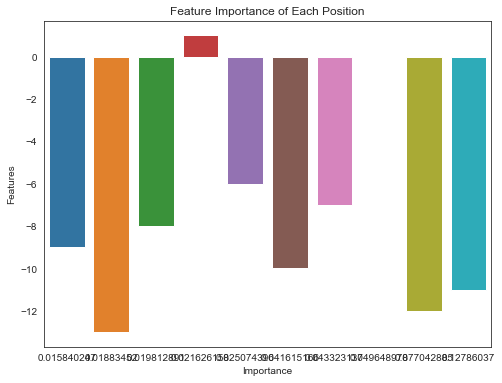

In [43]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [44]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.005354,-80
1,1,0.005806,-79
2,2,0.005900,-78
3,3,0.005709,-77
4,4,0.006120,-76
...,...,...,...
94,94,0.004926,14
95,95,0.005216,15
96,96,0.005243,16
97,97,0.005423,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

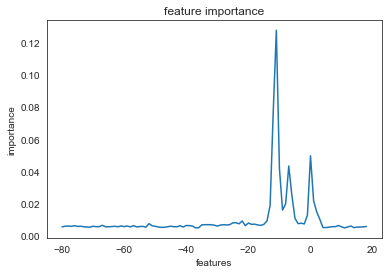

In [45]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [46]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8888510057961132
Precision: 0.9110320284697508
Recall: 0.8642808912896691
f1_score: 0.887040887040887


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


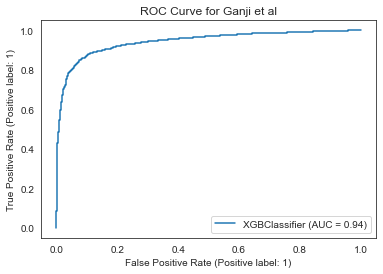

In [47]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


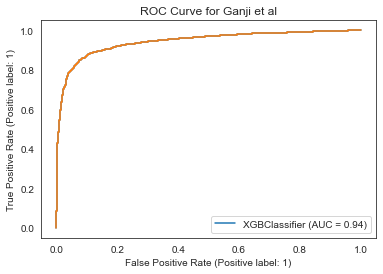

In [48]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

#roc_df.to_csv('d:/ROC Curve data/downstream_anselmi_xg_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [46]:
!pip install shap

In [47]:
import shap


In [48]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [49]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[7377, 9745, 6290, 4629, 3505, 435, 3373, 7275, 6664, 6196, 3575, 9161, 6739, 6599, 4934, 8466, 6759, 4030, 2119, 1564, 2214, 1521, 2401, 2349, 1266, 3830, 2573, 6187, 5029, 8080, 3299, 6708, 3975, 9062, 5531, 2024, 7606, 7200, 2444, 5610]


In [50]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [51]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,0.790,0.854,1.230,0.984,0.984,1.124,1.792,0.780,1.230,0.780,...,0.780,0.984,1.230,0.780,1.230,0.854,0.703,1.230,0.780,1.230
6345,1.323,0.703,1.230,1.124,1.792,0.790,1.323,0.984,0.984,1.124,...,0.703,0.703,0.703,0.703,0.854,0.790,1.230,1.323,0.984,1.124
8807,0.854,0.703,0.703,0.703,1.230,0.984,0.984,0.984,0.790,0.780,...,0.984,0.790,0.703,0.703,0.703,0.703,0.703,0.854,0.703,1.230
5017,0.984,1.124,1.323,1.230,0.780,0.703,0.615,0.703,0.703,0.703,...,1.792,0.984,0.790,1.323,0.790,0.854,0.615,0.854,0.703,0.703
2395,0.615,0.703,1.323,0.790,0.703,0.780,0.984,1.323,0.615,0.780,...,1.230,0.854,0.703,1.230,0.790,1.323,0.780,0.790,0.984,1.323
4771,0.854,0.615,0.854,0.703,1.230,0.790,0.854,0.790,1.323,1.230,...,0.790,1.323,0.780,0.790,1.230,0.703,0.854,1.230,0.780,0.703
6378,0.984,1.323,0.615,1.323,1.124,1.792,0.790,0.854,0.790,1.792,...,0.780,0.615,0.780,0.984,0.984,1.323,1.230,0.790,0.703,0.703
6038,0.984,0.984,1.792,1.124,1.792,0.984,1.124,1.230,0.703,0.780,...,1.792,0.780,0.790,1.792,0.790,0.703,0.780,0.984,1.792,0.790
2073,0.984,1.124,1.230,0.780,1.792,1.124,1.230,0.780,1.323,0.703,...,0.984,0.984,0.780,1.230,0.984,1.124,1.792,1.124,0.984,1.323
8765,1.323,0.790,1.323,0.790,1.323,0.790,0.703,0.854,0.790,1.230,...,0.703,0.615,0.703,0.854,0.703,0.703,0.703,0.703,0.703,0.615


# X promoters

In [52]:
X_promoters= promoter.drop(columns=['label']) #X.loc[:14668]
X_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,0.790,0.854,0.703,0.703,1.230,1.124,1.792,0.984,0.790,0.703,...,0.780,1.792,1.124,1.230,0.780,1.792,0.790,0.703,0.780,1.230
1,0.615,0.703,0.854,0.703,0.790,1.792,0.790,0.854,0.790,1.230,...,1.323,0.790,0.703,0.703,1.323,1.124,1.230,0.703,0.854,0.703
2,0.780,0.703,0.703,1.230,0.790,1.323,0.780,1.230,0.780,0.703,...,0.703,0.790,1.323,0.703,0.615,0.854,0.615,0.703,0.854,0.790
3,0.703,0.703,1.323,1.124,1.792,1.124,1.792,0.790,0.703,0.703,...,0.780,0.703,0.615,1.323,0.780,0.703,0.615,0.703,0.854,0.790
4,1.230,1.323,0.780,0.703,0.615,0.703,0.854,0.615,0.703,0.854,...,1.323,0.790,0.703,0.854,0.615,0.703,0.780,1.792,1.124,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,1.323,0.780,0.790,1.792,0.790,1.323,1.124,0.984,1.792,0.780,...,0.790,1.230,1.323,0.780,0.790,1.230,0.854,0.615,0.854,0.703
14665,1.230,0.790,0.854,0.703,1.230,0.790,0.854,0.703,0.703,1.230,...,0.780,1.230,0.984,0.780,0.703,0.790,1.792,0.984,0.984,0.790
14666,0.790,0.984,1.230,0.703,0.703,0.703,0.703,0.703,0.780,1.323,...,0.984,1.323,0.790,1.230,0.703,0.780,0.984,0.984,1.323,1.230
14667,0.703,1.230,0.790,1.323,0.780,0.703,0.790,1.792,0.780,0.790,...,0.703,0.780,0.984,1.323,0.615,0.780,0.984,1.323,0.790,1.230


In [53]:
explainer = shap.TreeExplainer(clf, X_promoters)
shap_values = explainer.shap_values(X_promoters)

100%|===================| 14664/14669 [04:22<00:00]        

In [54]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

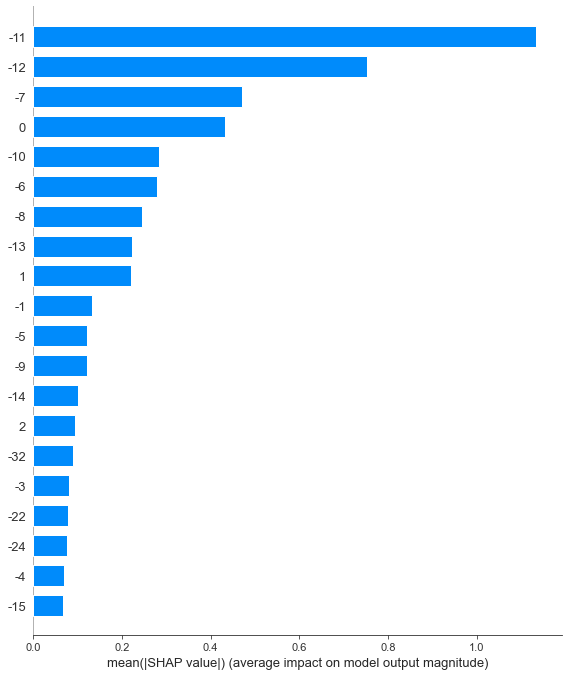

In [55]:
shap.summary_plot(shap_values,X_promoters, plot_type="bar", feature_names = X_promoters.columns)

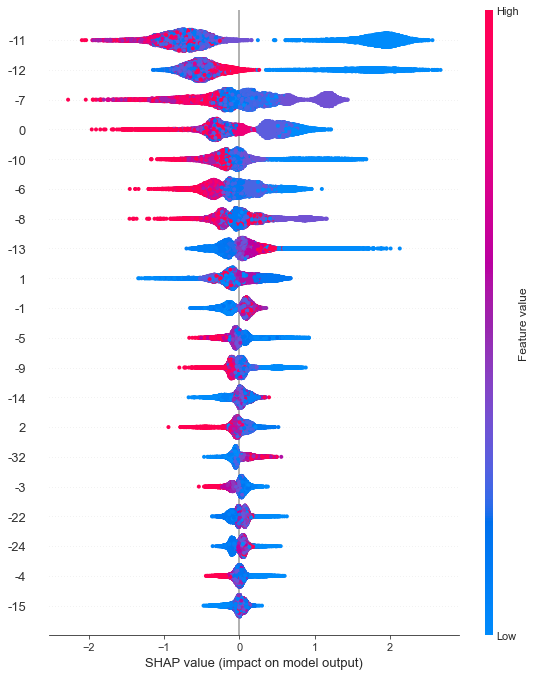

In [56]:
shap.summary_plot(shap_values, X_promoters, feature_names = X_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

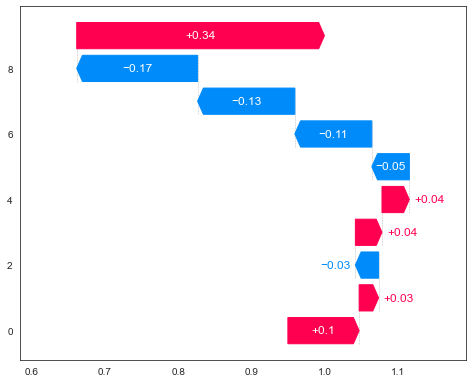

In [55]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [ ]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [49]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\anselmi\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\anselmi\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\anselmi\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\anselmi\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [50]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Anselmi Test Organism')]

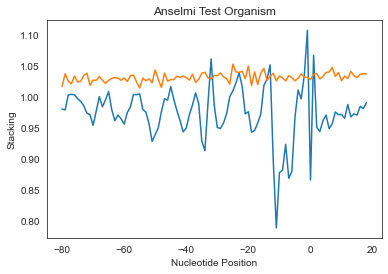

In [51]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Anselmi Test Organism')

## Test Labels

In [52]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [53]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [54]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9238095238095239


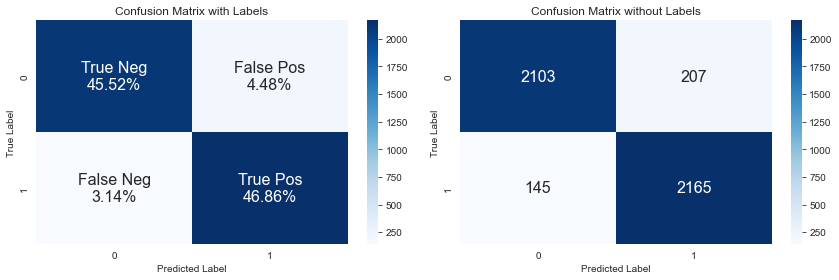

In [55]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [57]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.9264069264069265, Precision: 0.9156118143459916, Recall: 0.9393939393939394, F1 Score: 0.9273504273504274, MCC: 0.8531016738996086, Specificity: 0.9134199134199135
Fold 2/10
 Accuracy: 0.9264069264069265, Precision: 0.8987854251012146, Recall: 0.961038961038961, F1 Score: 0.9288702928870294, MCC: 0.8548669350823609, Specificity: 0.8917748917748918
Fold 3/10
 Accuracy: 0.9090909090909091, Precision: 0.895397489539749, Recall: 0.9264069264069265, F1 Score: 0.9106382978723404, MCC: 0.8186729145474189, Specificity: 0.8917748917748918
Fold 4/10
 Accuracy: 0.9264069264069265, Precision: 0.9020408163265307, Recall: 0.9567099567099567, F1 Score: 0.9285714285714286, MCC: 0.8543844137259037, Specificity: 0.8961038961038961
Fold 5/10
 Accuracy: 0.9393939393939394, Precision: 0.9432314410480349, Recall: 0.935064935064935, F1 Score: 0.9391304347826087, MCC: 0.8788208180989135, Specificity: 0.9437229437229437
Fold 6/10
 Accuracy: 0.922077922077922, Precision: 0.929515418502202

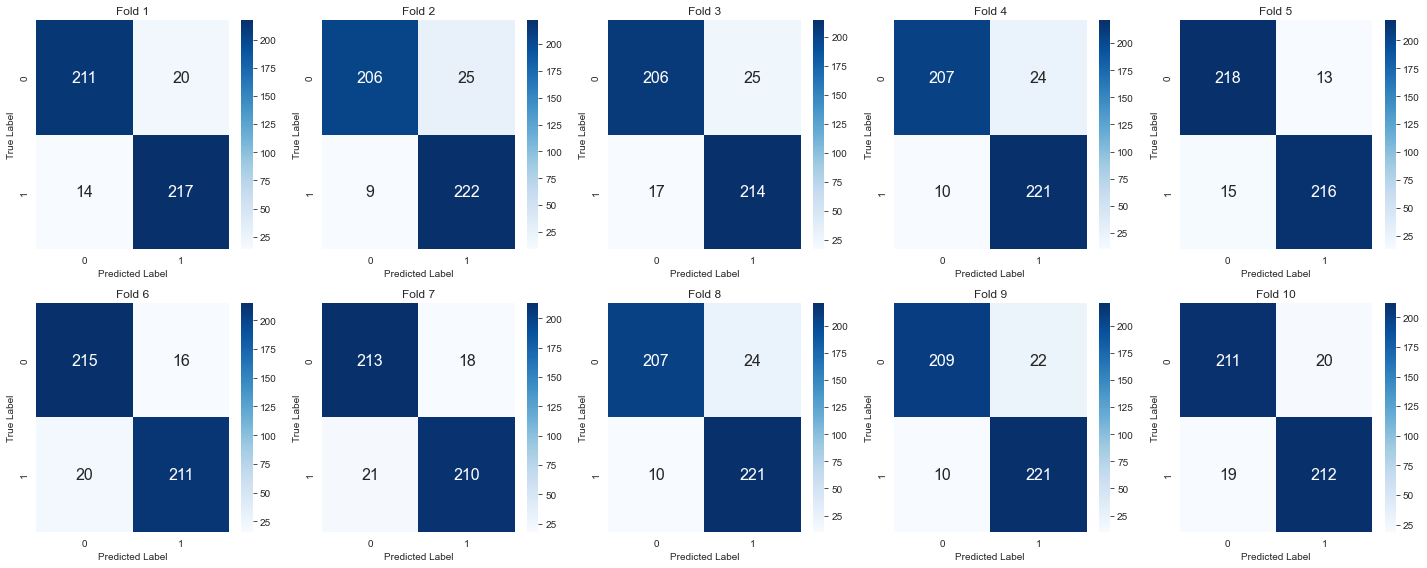

In [58]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [59]:
test_accuracy

[0.9264069264069265,
 0.9264069264069265,
 0.9090909090909091,
 0.9264069264069265,
 0.9393939393939394,
 0.922077922077922,
 0.9155844155844156,
 0.9264069264069265,
 0.9307359307359307,
 0.9155844155844156]

In [60]:
test_precision

[0.9156118143459916,
 0.8987854251012146,
 0.895397489539749,
 0.9020408163265307,
 0.9432314410480349,
 0.9295154185022027,
 0.9210526315789473,
 0.9020408163265307,
 0.9094650205761317,
 0.9137931034482759]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [61]:
test_recall

[0.9393939393939394,
 0.961038961038961,
 0.9264069264069265,
 0.9567099567099567,
 0.935064935064935,
 0.9134199134199135,
 0.9090909090909091,
 0.9567099567099567,
 0.9567099567099567,
 0.9177489177489178]

In [62]:
test_specificity

[0.9134199134199135,
 0.8917748917748918,
 0.8917748917748918,
 0.8961038961038961,
 0.9437229437229437,
 0.9307359307359307,
 0.922077922077922,
 0.8961038961038961,
 0.9047619047619048,
 0.9134199134199135]

In [63]:
test_f1_score

[0.9273504273504274,
 0.9288702928870294,
 0.9106382978723404,
 0.9285714285714286,
 0.9391304347826087,
 0.9213973799126638,
 0.915032679738562,
 0.9285714285714286,
 0.9324894514767932,
 0.9157667386609072]

In [64]:
test_mcc

[0.8531016738996086,
 0.8548669350823609,
 0.8186729145474189,
 0.8543844137259037,
 0.8788208180989135,
 0.8442824303484852,
 0.8312389335458098,
 0.8543844137259037,
 0.8626366034085179,
 0.8311766194459774]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [65]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense anselmi promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.615,0.780,0.984,1.230,0.854,0.703,1.230,0.780,0.703,0.703,...,0.984,0.790,0.703,0.703,0.703,0.780,1.230,0.703,0.780,1
1,1.230,0.703,0.780,1.792,1.124,1.230,0.854,0.615,0.703,0.780,...,0.703,0.780,1.792,0.790,0.854,1.230,0.984,0.790,0.703,1
2,0.703,1.230,0.790,0.854,0.790,1.230,0.854,0.615,0.854,0.615,...,0.780,1.792,0.780,1.230,1.124,1.323,0.615,0.703,0.703,1
3,1.230,0.780,0.615,0.780,1.230,0.703,0.780,1.792,0.780,0.790,...,0.790,0.984,1.230,0.780,1.230,0.703,0.703,0.854,0.790,1
4,0.780,0.984,1.323,0.615,0.703,0.703,0.854,0.615,1.323,0.984,...,0.790,0.780,0.984,1.792,0.984,0.984,0.780,1.230,0.780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,1.124,1.323,0.703,0.703,1.230,0.984,0.984,0.984,0.780,0.703,...,0.703,1.230,0.790,0.854,1.230,1.124,1.323,1.230,0.984,0
12164,0.703,1.230,0.780,0.703,1.230,1.124,0.984,1.323,0.790,1.792,...,1.323,0.984,1.124,0.984,1.230,0.780,1.792,1.124,1.230,0
12165,0.780,0.790,1.230,0.854,0.790,0.984,0.984,0.984,1.230,0.780,...,1.323,0.780,0.615,0.703,1.323,0.790,0.780,1.792,0.984,0
12166,0.703,0.780,1.230,0.854,0.703,0.790,1.792,1.124,0.984,0.984,...,0.984,0.984,1.230,1.323,0.780,0.703,0.703,0.615,0.780,0


In [66]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [67]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8077239112571898, Precision: 0.817258883248731, Recall: 0.7931034482758621, F1 Score: 0.8050000000000002, MCC: 0.6157263460440898, Specificity: 0.9134199134199135
Fold 2/10
 Accuracy: 0.8200493015612161, Precision: 0.8155339805825242, Recall: 0.8275862068965517, F1 Score: 0.8215158924205379, MCC: 0.6401640122160893, Specificity: 0.8223684210526315
Fold 3/10
 Accuracy: 0.8258011503697618, Precision: 0.828099173553719, Recall: 0.8226600985221675, F1 Score: 0.8253706754530478, MCC: 0.651618026045269, Specificity: 0.8125
Fold 4/10
 Accuracy: 0.8307313064913723, Precision: 0.8297872340425532, Recall: 0.8325123152709359, F1 Score: 0.8311475409836065, MCC: 0.6614650430039756, Specificity: 0.8289473684210527
Fold 5/10
 Accuracy: 0.8266228430566968, Precision: 0.8291873963515755, Recall: 0.8223684210526315, F1 Score: 0.8257638315441783, MCC: 0.6532651650029305, Specificity: 0.8289473684210527
Fold 6/10
 Accuracy: 0.8340180772391126, Precision: 0.8181818181818182, Recall: 

In [68]:
antisense_accuracy

[0.8077239112571898,
 0.8200493015612161,
 0.8258011503697618,
 0.8307313064913723,
 0.8266228430566968,
 0.8340180772391126,
 0.8184059161873459,
 0.8340180772391126,
 0.8149671052631579,
 0.8363486842105263]

In [69]:
antisense_precision

[0.817258883248731,
 0.8155339805825242,
 0.828099173553719,
 0.8297872340425532,
 0.8291873963515755,
 0.8181818181818182,
 0.8105939004815409,
 0.8232484076433121,
 0.8165289256198347,
 0.8471986417657046]

In [70]:
antisense_recall

[0.7931034482758621,
 0.8275862068965517,
 0.8226600985221675,
 0.8325123152709359,
 0.8223684210526315,
 0.8585526315789473,
 0.8305921052631579,
 0.850328947368421,
 0.8125,
 0.8207236842105263]

In [71]:
antisense_specificity

[0.9134199134199135,
 0.8223684210526315,
 0.8125,
 0.8289473684210527,
 0.8289473684210527,
 0.8308702791461412,
 0.8095238095238095,
 0.80623973727422,
 0.8177339901477833,
 0.8174342105263158]

In [72]:
antisense_f1_score

[0.8050000000000002,
 0.8215158924205379,
 0.8253706754530478,
 0.8311475409836065,
 0.8257638315441783,
 0.8378812199036917,
 0.8204711616571893,
 0.8365695792880258,
 0.8145094806265457,
 0.8337510442773602]

In [73]:
antisense_mcc

[0.6157263460440898,
 0.6401640122160893,
 0.651618026045269,
 0.6614650430039756,
 0.6532651650029305,
 0.6688626911584217,
 0.6370125091819209,
 0.6684060089389688,
 0.6299418789920296,
 0.6730260747042512]

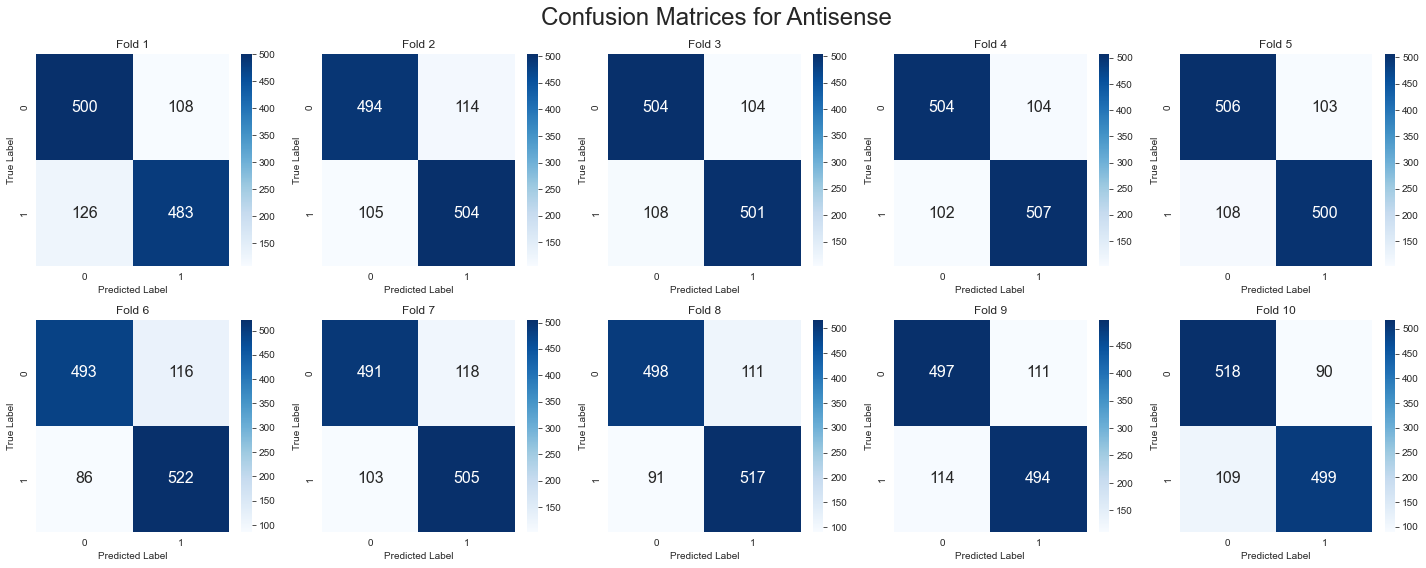

In [74]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

In [75]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced anselmi promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.780,1.230,1.124,1.323,0.615,1.323,1.124,0.984,0.984,1.230,...,0.703,0.780,1.230,0.703,0.703,0.703,0.854,1.230,0.790,1
1,0.854,1.230,0.790,0.703,0.703,0.854,0.703,0.703,0.615,1.323,...,0.790,0.780,1.792,0.780,0.703,0.615,0.854,0.790,1.792,1
2,0.984,0.984,1.792,0.984,0.790,0.854,0.790,1.792,0.790,0.780,...,0.780,1.792,0.790,0.703,0.854,0.703,0.790,1.792,0.780,1
3,1.323,0.790,0.703,1.323,0.780,0.790,1.230,0.854,0.703,0.615,...,0.703,0.703,1.323,1.124,1.230,0.703,0.703,0.854,1.230,1
4,0.780,1.230,0.780,0.703,0.703,0.615,0.703,0.703,0.854,1.230,...,1.323,0.790,0.703,0.780,1.230,0.703,0.703,0.703,0.854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,0.984,1.792,0.984,0.984,0.790,1.323,1.124,0.984,1.792,1.124,...,0.790,0.703,1.323,0.780,1.230,0.984,0.984,1.124,0.984,0
12126,0.984,1.124,1.230,1.323,1.124,1.792,0.790,0.703,0.780,1.792,...,0.984,1.792,1.124,1.230,0.703,1.323,0.984,1.124,1.792,0
12127,0.703,0.780,1.230,0.703,0.780,1.230,1.323,0.984,1.124,1.230,...,0.790,1.323,1.124,1.792,0.984,0.790,1.323,0.984,0.790,0
12128,1.792,0.984,1.124,1.230,0.703,0.780,1.230,1.323,0.984,0.790,...,1.792,1.124,0.984,1.230,0.854,1.230,1.124,0.984,1.792,0


In [76]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [77]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8268755152514426, Precision: 0.8476357267950964, Recall: 0.7973640856672158, F1 Score: 0.8217317487266553, MCC: 0.6549223716428411, Specificity: 0.8519736842105263
Fold 2/10
 Accuracy: 0.8087386644682605, Precision: 0.8342245989304813, Recall: 0.771004942339374, F1 Score: 0.8013698630136987, MCC: 0.6192845400514062, Specificity: 0.8564356435643564
Fold 3/10
 Accuracy: 0.8227535037098104, Precision: 0.8475177304964538, Recall: 0.7874794069192751, F1 Score: 0.816396242527754, MCC: 0.6471558462126944, Specificity: 0.8465346534653465
Fold 4/10
 Accuracy: 0.809563066776587, Precision: 0.8418181818181818, Recall: 0.7627677100494233, F1 Score: 0.8003457216940363, MCC: 0.621907577619147, Specificity: 0.858085808580858
Fold 5/10
 Accuracy: 0.7955482275350371, Precision: 0.8211091234347049, Recall: 0.7561779242174629, F1 Score: 0.7873070325900515, MCC: 0.5929826206129294, Specificity: 0.8564356435643564
Fold 6/10
 Accuracy: 0.8252267106347898, Precision: 0.8444055944055944

In [78]:
internal_accuracy

[0.8268755152514426,
 0.8087386644682605,
 0.8227535037098104,
 0.809563066776587,
 0.7955482275350371,
 0.8252267106347898,
 0.8392415498763397,
 0.8194558944765046,
 0.8293487221764221,
 0.8532563891178895]

In [79]:
internal_precision

[0.8476357267950964,
 0.8342245989304813,
 0.8475177304964538,
 0.8418181818181818,
 0.8211091234347049,
 0.8444055944055944,
 0.8537005163511188,
 0.8412698412698413,
 0.8647166361974405,
 0.8821428571428571]

In [80]:
internal_recall

[0.7973640856672158,
 0.771004942339374,
 0.7874794069192751,
 0.7627677100494233,
 0.7561779242174629,
 0.7970297029702971,
 0.8184818481848185,
 0.7871287128712872,
 0.7805280528052805,
 0.8151815181518152]

In [81]:
internal_specificity

[0.8519736842105263,
 0.8564356435643564,
 0.8465346534653465,
 0.858085808580858,
 0.8564356435643564,
 0.834983498349835,
 0.8533772652388797,
 0.8599670510708401,
 0.8517298187808896,
 0.8780889621087314]

In [82]:
internal_f1_score

[0.8217317487266553,
 0.8013698630136987,
 0.816396242527754,
 0.8003457216940363,
 0.7873070325900515,
 0.8200339558573854,
 0.8357203032855939,
 0.8132992327365729,
 0.8204683434518647,
 0.8473413379073756]

In [83]:
internal_mcc

[0.6549223716428411,
 0.6192845400514062,
 0.6471558462126944,
 0.621907577619147,
 0.5929826206129294,
 0.6514615885322658,
 0.6790491258362086,
 0.6402175397515774,
 0.6618092395724036,
 0.7085353370659315]

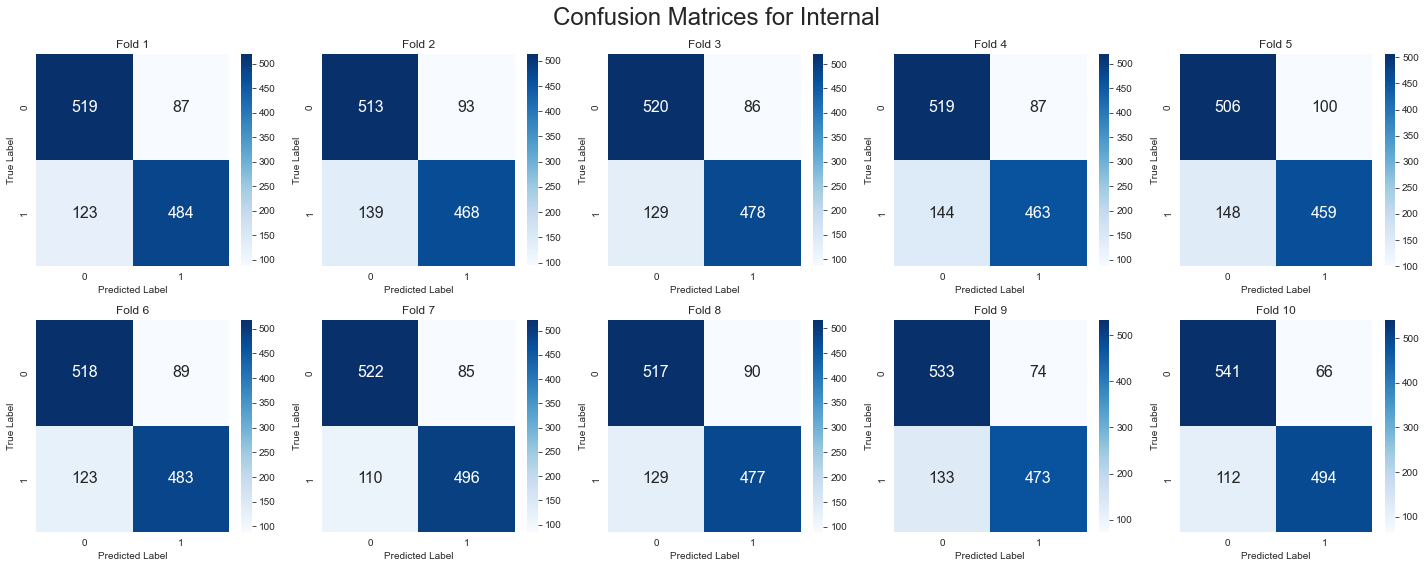

In [84]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
